In [ ]:
# set random seed
import numpy as np
np.random.seed(4)

In [3]:
import pandas as pd
df = pd.read_csv('/Users/apple/Desktop/sc_cases.zip',compression='gzip')

In [5]:
df.head(2)

,case_name,opinion_type,date_standard,authorship,x_republican,maj_judges,dissent_judges,topic_id,cite_count,opinion_text
0,ERICK CORNELL CLAY v. UNITED STATES,majority,2003-03-04,GINSBURG,0.0,"['BREYER, STEPHEN', 'GINSBURG, RUTH', 'KENNEDY...",[],1.0,2926.0,JUSTICE GINSBURG delivered the opinion of the ...
1,"HILLSIDE DAIRY INC., A&A DAIRY, L&S DAIRY, AND...",majority,2003-06-09,STEVENS,1.0,"['BREYER, STEPHEN', 'GINSBURG, RUTH', 'KENNEDY...","['THOMAS, CLARENCE']",8.0,117.0,Justice Stevens delivered the opinion of the C...


### get to know the text

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 820 entries, 0 to 819
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   case_name       786 non-null    object 
 1   opinion_type    820 non-null    object 
 2   date_standard   820 non-null    object 
 3   authorship      820 non-null    object 
 4   x_republican    803 non-null    float64
 5   maj_judges      786 non-null    object 
 6   dissent_judges  786 non-null    object 
 7   topic_id        786 non-null    float64
 8   cite_count      812 non-null    float64
 9   opinion_text    820 non-null    object 
dtypes: float64(3), object(7)
memory usage: 64.2+ KB


In [7]:
df.isnull().sum()

case_name         34
opinion_type       0
date_standard      0
authorship         0
x_republican      17
maj_judges        34
dissent_judges    34
topic_id          34
cite_count         8
opinion_text       0
dtype: int64

In [8]:
df.shape

(820, 10)

In [9]:
df=df.dropna()

In [10]:
df['authorship'].value_counts()

SCALIA                                           86
GINSBURG                                         81
THOMAS                                           79
KENNEDY                                          79
BREYER                                           73
SOUTER                                           72
STEVENS                                          72
O'CONNOR                                         52
REHNQUIST                                        49
ROBERTS                                          28
ALITO                                            23
Breyer                                           12
Roberts                                          10
Alito                                             9
Thomas                                            8
Ginsburg                                          8
Scalia                                            8
Stevens                                           7
Kennedy                                           7
SOTOMAYOR   

In [11]:
df['authorship']=df['authorship'].str.upper()

In [12]:
keep_judges=list(df['authorship'].value_counts().index)[:11]

In [13]:
df=df[df['authorship'].isin(keep_judges)]
df['authorship'].value_counts()

SCALIA       94
GINSBURG     89
THOMAS       87
KENNEDY      86
BREYER       85
STEVENS      79
SOUTER       77
O'CONNOR     52
REHNQUIST    49
ROBERTS      38
ALITO        32
Name: authorship, dtype: int64

In [14]:
df['date_standard'] = pd.to_datetime(df['date_standard'])
df['date_standard']

0     2003-03-04
1     2003-06-09
2     2005-03-30
4     2005-06-06
5     2005-06-13
         ...    
815   2001-04-18
816   2001-04-24
817   2001-04-24
818   2001-05-14
819   2001-05-14
Name: date_standard, Length: 768, dtype: datetime64[ns]

In [15]:
df['year']=df['date_standard'].dt.year
df['year'].value_counts()

2001    77
2000    76
2009    74
2002    74
2004    73
2005    70
2003    70
2007    65
2010    64
2006    63
2008    62
Name: year, dtype: int64

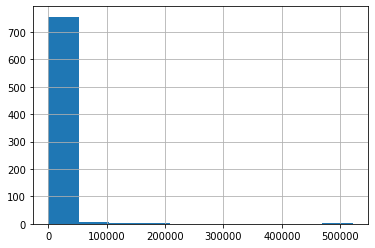

In [16]:
df['cite_count'].hist()

## log normalize the scale

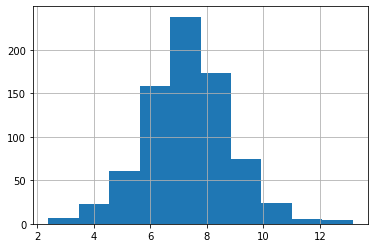

In [18]:
import numpy as np
df['log_cite']=np.log(df['cite_count'])
df['log_cite'].hist()

In [19]:
df.to_pickle('/Users/apple/Desktop/sc_cases_cleaned.pkl',compression='gzip')

In [ ]:
import nltk

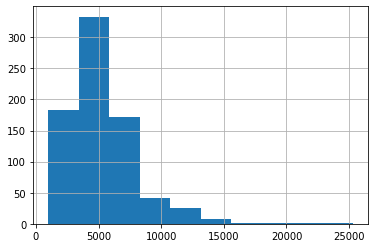

In [20]:
def get_words_per_doc(txt):
    # split text into words and count them.
    return len(txt.split()) 

# apply to our dataframe
df['num_words'] = df['opinion_text'].apply(get_words_per_doc)
df['num_words'].hist()

### groupby(  )[  ].mean.plot

In [ ]:
# plot length by year
ax = df.groupby('year')['num_words'].mean().plot()
ax.set_ylabel('Average Opinion Length')
import matplotlib.pyplot as plt
plt.show()

## iterrows find the most frequent token

In [22]:
from collections import Counter
freqs = Counter()
for i, row in df.iterrows():
    freqs.update(row['opinion_text'].lower().split())
    if i > 100:
        break
freqs.most_common()[:20] # can use most frequent words as style/function words

[('the', 31600),
 ('of', 15978),
 ('to', 12330),
 ('a', 8954),
 ('that', 8521),
 ('in', 8324),
 ('and', 7619),
 ('at', 5044),
 ('for', 4496),
 ('is', 4032),
 ('not', 3577),
 ('l.', 3216),
 ('ed.', 3190),
 ('as', 3048),
 ('or', 2904),
 ('s.', 2828),
 ('§', 2738),
 ('ct.', 2735),
 ('court', 2615),
 ('on', 2587)]

In [24]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
# sample 20% of the dataset
dfs = df.sample(frac=.2) 

# apply compound sentiment score to data-frame
def get_sentiment(snippet):
    return sid.polarity_scores(snippet)['compound']
dfs['sentiment'] = dfs['opinion_text'].apply(get_sentiment)

In [26]:
dfs.head(2)

,case_name,opinion_type,date_standard,authorship,x_republican,maj_judges,dissent_judges,topic_id,cite_count,opinion_text,year,log_cite,num_words,sentiment
421,FLA. DEP'T OF REVENUE v. PICCADILLY CAFETERIAS...,majority,2008-06-16,THOMAS,1.0,"['ALITO, SAMUEL', 'GINSBURG, RUTH', 'KENNEDY, ...","['BREYER, STEPHEN', 'STEVENS, JOHN']",8.0,314.0,Justice Thomas delivered the opinion of the Co...,2008,5.749393,5893,0.9997
162,NORFOLK SOUTHERN RAILWAY COMPANY v. JAMES N. K...,majority,2004-11-09,O'CONNOR,1.0,"['BREYER, STEPHEN', 'GINSBURG, RUTH', 'KENNEDY...",[],8.0,970.0,Justice O'Connor delivered the opinion of the ...,2004,6.877296,6233,0.9998


In [27]:
dfs.sort_values('sentiment',inplace=True)
# print beginning of most positive documents
[x[50:150] for x  in dfs[-5:]['opinion_text']]

['he Court.\n\nPetitioners are the Boy Scouts of America and the Monmouth Council, a division of the Boy',
 't.\n\nIn the latest chapter of this long-litigated original-jurisdiction case, the Quechan Tribe (Trib',
 '\nWe granted certiorari in this case to decide whether imposing class arbitration on parties whose ar',
 't. \n\n This case requires us to decide whether the use of race as a factor in student admissions by t',
 ' Court. \n\nThe International Court of Justice (ICJ), located in the Hague, is a tribunal established ']

In [28]:
# print beginning of most negative documents
[x[50:150] for x  in dfs[:5]['opinion_text']]

['he Court. \n\n Petitioner Josue Leocal, a Haitian citizen who is a lawful permanent resident of the Un',
 ' \n\n  Federal immigration law provides that any "alien who is convicted of an aggravated felony at an',
 '. \n\n This case requires us to address, for the second time in a decade and a half, whether it is per',
 "\n\n This case presents the question whether a prisoner can satisfy the Prison Litigation Reform Act's",
 ' Court. \n\n  In an effort to address the large number of prisoner complaints filed in federal court, ']

In [32]:
import re
# baker-bloom economic uncertainty
pattern1 = r'(\b)uncertain[a-z]*'
pattern2 = r'(\b)econom[a-z]*'
pattern3 = r'(\b)congress(\b)|(\b)deficit(\b)|(\b)federal reserve(\b)|(\b)legislation(\b)|(\b)regulation(\b)|(\b)white house(\b)'

In [33]:
re.search(pattern1,'The White House tried to calm uncertainty in the markets.')

<re.Match object; span=(30, 41), match='uncertainty'>

In [34]:
re.search(pattern3,'The Congress tried to calm uncertainty in the markets.', re.IGNORECASE)

<re.Match object; span=(4, 12), match='Congress'>

In [35]:
def indicates_uncertainty(doc):
    m1 = re.search(pattern1, doc, re.IGNORECASE)
    m2 = re.search(pattern2, doc, re.IGNORECASE)
    m3 = re.search(pattern3, doc, re.IGNORECASE)
    if m1 and m2 and m3:
        return True
    else:
        return False

In [36]:
indicates_uncertainty('The White House tried to calm uncertainty in the markets.')

False

In [37]:
df['uncertainty'] = df['opinion_text'].apply(indicates_uncertainty)

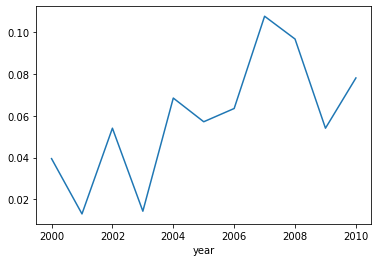

In [38]:
df.groupby('year')['uncertainty'].mean().plot()

In [39]:
df=pd.read_pickle('/Users/apple/Desktop/sc_cases_cleaned.pkl',compression='gzip')
df.head(2)

,case_name,opinion_type,date_standard,authorship,x_republican,maj_judges,dissent_judges,topic_id,cite_count,opinion_text,year,log_cite
0,ERICK CORNELL CLAY v. UNITED STATES,majority,2003-03-04,GINSBURG,0.0,"['BREYER, STEPHEN', 'GINSBURG, RUTH', 'KENNEDY...",[],1.0,2926.0,JUSTICE GINSBURG delivered the opinion of the ...,2003,7.981392
1,"HILLSIDE DAIRY INC., A&A DAIRY, L&S DAIRY, AND...",majority,2003-06-09,STEVENS,1.0,"['BREYER, STEPHEN', 'GINSBURG, RUTH', 'KENNEDY...","['THOMAS, CLARENCE']",8.0,117.0,Justice Stevens delivered the opinion of the C...,2003,4.762174


In [66]:
text = "Prof. Zurich hailed from Zurich. She got 3 M.A.'s from ETH."

In [67]:
import spacy
import en_core_web_sm
nlp = en_core_web_sm.load()
doc = nlp(text)
sentences = list(doc.sents)
print(sentences)

[Prof. Zurich hailed from Zurich., She got 3 M.A.'s from ETH.]


In [68]:
[token.text for token in doc]

['Prof.',
 'Zurich',
 'hailed',
 'from',
 'Zurich',
 '.',
 'She',
 'got',
 '3',
 'M.A.',
 "'s",
 'from',
 'ETH',
 '.']

In [69]:
print(str.split(text))

['Prof.', 'Zurich', 'hailed', 'from', 'Zurich.', 'She', 'got', '3', "M.A.'s", 'from', 'ETH.']


In [51]:
from gensim.utils import simple_preprocess
print(simple_preprocess(text))

['prof', 'zurich', 'hailed', 'from', 'zurich', 'she', 'got', 'from', 'eth']


In [52]:
from collections import Counter
print(Counter(simple_preprocess(text)))

Counter({'zurich': 2, 'from': 2, 'prof': 1, 'hailed': 1, 'she': 1, 'got': 1, 'eth': 1})


In [53]:
df['tokens_simple'] = df['opinion_text'].apply(simple_preprocess)
df['tokens_simple']

0      [justice, ginsburg, delivered, the, opinion, o...
1      [justice, stevens, delivered, the, opinion, of...
2      [justice, connor, delivered, the, opinion, of,...
4      [justice, kennedy, delivered, the, opinion, of...
5      [justice, kennedy, delivered, the, opinion, of...
                             ...                        
815    [justice, breyer, delivered, the, opinion, of,...
816    [justice, souter, delivered, the, opinion, of,...
817    [justice, scalia, delivered, the, opinion, of,...
818    [justice, thomas, delivered, the, opinion, of,...
819    [justice, connor, delivered, the, opinion, of,...
Name: tokens_simple, Length: 768, dtype: object

## Tagging

In [54]:
text = 'Science cannot solve the ultimate mystery of nature. And that is because, in the last analysis, we ourselves are a part of the mystery that we are trying to solve.'

#nltk.download('averaged_perceptron_tagger')
from nltk.tag import perceptron 
from nltk import word_tokenize
tagger = perceptron.PerceptronTagger()
tokens = word_tokenize(text)
tagged_sentence = tagger.tag(tokens)
tagged_sentence

[('Science', 'NN'),
 ('can', 'MD'),
 ('not', 'RB'),
 ('solve', 'VB'),
 ('the', 'DT'),
 ('ultimate', 'JJ'),
 ('mystery', 'NN'),
 ('of', 'IN'),
 ('nature', 'NN'),
 ('.', '.'),
 ('And', 'CC'),
 ('that', 'DT'),
 ('is', 'VBZ'),
 ('because', 'RB'),
 (',', ','),
 ('in', 'IN'),
 ('the', 'DT'),
 ('last', 'JJ'),
 ('analysis', 'NN'),
 (',', ','),
 ('we', 'PRP'),
 ('ourselves', 'PRP'),
 ('are', 'VBP'),
 ('a', 'DT'),
 ('part', 'NN'),
 ('of', 'IN'),
 ('the', 'DT'),
 ('mystery', 'NN'),
 ('that', 'IN'),
 ('we', 'PRP'),
 ('are', 'VBP'),
 ('trying', 'VBG'),
 ('to', 'TO'),
 ('solve', 'VB'),
 ('.', '.')]

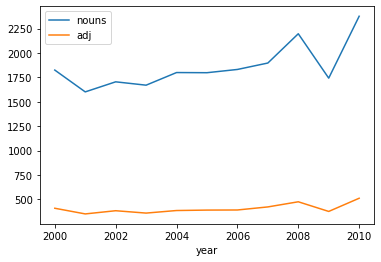

In [85]:
from collections import Counter
from nltk import word_tokenize

def get_nouns_adj(snippet):
    tags = [x[1] for x in tagger.tag(word_tokenize(snippet))]
    num_nouns = len([t for t in tags if t[0] == 'N'])
    num_adj = len([t for t in tags if t[0] == 'J'])
    return num_nouns, num_adj

df['nouns'], df['adj'] = zip(*df['opinion_text'].map(get_nouns_adj))
df.groupby('year')[['nouns','adj']].mean().plot()

In [86]:
# Get list of nouns, adjectives, and verbs from WordNet
# nltk.download('wordnet')
from nltk import wordnet as wn

nouns = set([x.lemma_names()[0].lower() 
             for x in wn.wordnet.all_synsets('n')])

adjectives = set([x.lemma_names()[0].lower() 
             for x in wn.wordnet.all_synsets('a')])

verbs = set([x.lemma_names()[0].lower() 
             for x in wn.wordnet.all_synsets('v')])

In [56]:
dfs = df.sample(10)
dfs['doc'] = dfs['opinion_text'].apply(nlp)

In [57]:
# The spacy model already gives you sentences and tokens.
# For example:
sent1 = list(dfs['doc'].iloc[0].sents)[1]
sent1 # sentence

In this case we must decide whether a failure to give a suspect the warnings prescribed by Miranda v. Arizona,384 U.S. 436, 16 L. Ed.

In [58]:
list(sent1) 

[In,
 this,
 case,
 we,
 must,
 decide,
 whether,
 a,
 failure,
 to,
 give,
 a,
 suspect,
 the,
 warnings,
 prescribed,
 by,
 Miranda,
 v.,
 Arizona,384,
 U.S.,
 436,
 ,,
 16,
 L.,
 Ed,
 .]

In [59]:
# lemmas
[x.lemma_ for x in sent1]

['in',
 'this',
 'case',
 '-PRON-',
 'must',
 'decide',
 'whether',
 'a',
 'failure',
 'to',
 'give',
 'a',
 'suspect',
 'the',
 'warning',
 'prescribe',
 'by',
 'Miranda',
 'v.',
 'Arizona,384',
 'U.S.',
 '436',
 ',',
 '16',
 'L.',
 'Ed',
 '.']

In [61]:
dfs['num_words'] = dfs['doc'].apply(lambda x: len(list(x)))
dfs['num_words'] = dfs['doc'].apply(lambda x: len(list(x.sents)))


print(len(tokens),'words in corpus.')
words_per_sent = len(tokens) / len(sentences)
print(words_per_sent,'words per sentence.')

35 words in corpus.
17.5 words per sentence.


In [62]:
from nltk import ngrams
from collections import Counter

# get n-gram counts for 10 documents
grams = []
for i, row in df.iterrows():
    tokens = row['opinion_text'].lower().split() # get tokens
    for n in range(2,4):
        grams += list(ngrams(tokens,n)) # get bigrams, trigrams, and quadgrams
    if i > 50:
        break
Counter(grams).most_common()[:8]  # most frequent n-grams

[(('of', 'the'), 2503),
 (('l.', 'ed.'), 2197),
 (('s.', 'ct.'), 1898),
 (('ed.', '2d'), 1618),
 (('l.', 'ed.', '2d'), 1618),
 (('that', 'the'), 1200),
 (('to', 'the'), 1077),
 (('in', 'the'), 951)]

In [63]:
from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer(min_df=0.01, # at min 1% of docs
                        max_df=.9,  
                        max_features=1000,
                        stop_words='english',
                        ngram_range=(1,3))
X = vec.fit_transform(df['opinion_text'])

# save the vectors
pd.to_pickle(X,'/Users/apple/Desktop/X.pkl')

# save the vectorizer 
# (so you can transform other documents, 
# also for the vocab)
pd.to_pickle(vec, '/Users/apple/Desktop/vec-3grams-1.pkl')

In [70]:
# tf-idf vectorizer up-weights rare/distinctive words
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(min_df=0.01, 
                        max_df=0.9,  
                        max_features=1000,
                        stop_words='english',
                        use_idf=True, # the new piece
                        ngram_range=(1,2))

X_tfidf = tfidf.fit_transform(df['opinion_text'])
#pd.to_pickle(X_tfidf,'X_tfidf.pkl')

In [72]:
vocab = tfidf.get_feature_names()
vocab[:10], vocab[-10:]

(['000', '10', '100', '101', '102', '103', '103 ct', '104', '104 ct', '105'],
 ['waters',
  'way',
  'west',
  'word',
  'words',
  'work',
  'writ',
  'year',
  'years',
  'york'])

1


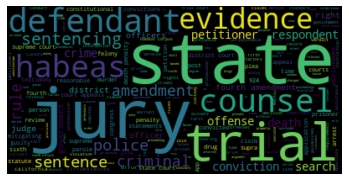

2


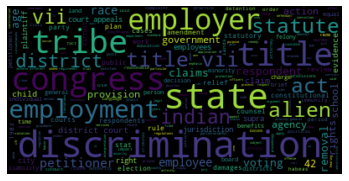

8


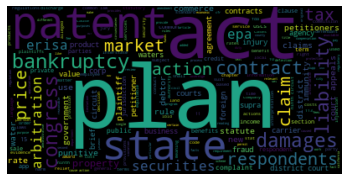

9


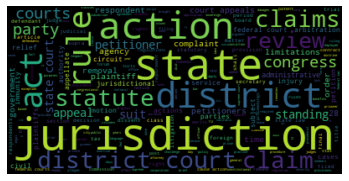

In [73]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

for topic_id in [1,2,8,9]: 
    slicer = df['topic_id'] == topic_id
    f = X_tfidf[slicer.values]
    total_freqs = list(np.array(f.sum(axis=0))[0])
    fdict = dict(zip(vocab,total_freqs))
    # generate word cloud of words with highest counts
    wordcloud = WordCloud().generate_from_frequencies(fdict) 
    print(topic_id)
    plt.clf()
    plt.imshow(wordcloud, interpolation='bilinear') 
    plt.axis("off") 
    plt.show()

In [76]:
import gensim
from sklearn.feature_extraction.text import CountVectorizer
# Convert sparse matrix to gensim corpus.
corpus = gensim.matutils.Sparse2Corpus(X_tfidf, documents_columns=False)

# Mapping from word IDs to words (To be used in LdaModel's id2word parameter)
id_map = dict((v, k) for k, v in vec.vocabulary_.items())

In [78]:
ldamodel= gensim.models.ldamodel.LdaModel(corpus, num_topics=5, id2word=id_map, passes=25, random_state=34)

In [79]:
print(list(ldamodel.show_topics()))

[(0, '0.001*"error" + 0.001*"plan" + 0.001*"employees" + 0.001*"employment" + 0.001*"benefits" + 0.001*"state" + 0.001*"intended" + 0.001*"action" + 0.001*"employer" + 0.001*"board"'), (1, '0.001*"jurisdictional" + 0.001*"counsel" + 0.001*"mitigating" + 0.001*"trial" + 0.001*"ex" + 0.001*"state" + 0.001*"death" + 0.001*"defendant" + 0.001*"prosecutor" + 0.001*"penalty"'), (2, '0.010*"state" + 0.009*"trial" + 0.009*"jurisdictional" + 0.008*"counsel" + 0.008*"habeas corpus" + 0.008*"defendant" + 0.007*"ex" + 0.007*"sentence" + 0.006*"sense" + 0.006*"criminal"'), (3, '0.001*"state" + 0.001*"habeas corpus" + 0.001*"petition" + 0.001*"plan" + 0.001*"judicial" + 0.001*"equal" + 0.001*"district" + 0.001*"reversed" + 0.001*"petitioner" + 0.001*"state court"'), (4, '0.008*"state" + 0.006*"action" + 0.005*"congress" + 0.005*"district" + 0.004*"statute" + 0.004*"grant" + 0.004*"actions" + 0.004*"judicial" + 0.004*"respondent" + 0.004*"tax"')]


In [81]:
np.random.seed(4)
#%% Univariate feature selection using chi2
from sklearn.feature_selection import SelectKBest, chi2, f_classif, f_regression, f_classif, mutual_info_classif
select = SelectKBest(chi2, k=10)
Y = df['cite_count']
X_new = select.fit_transform(X, Y)
# top 10 features by chi-squared:
[vocab[i] for i in np.argsort(select.scores_)[-10:]]

['punitive',
 'districts',
 'agreement',
 'banks',
 'entitled',
 'favor',
 'war',
 'military',
 'minority',
 'waters']

In [82]:
#%% top 10 features by  ANOVA F-value:
select = SelectKBest(f_classif, k=10)
select.fit(X, Y)
[vocab[i] for i in np.argsort(select.scores_)[-10:]]

['life',
 'writ',
 'waters',
 'black',
 'war',
 'bear',
 'death penalty',
 'entitled',
 'parole',
 'favor']

In [83]:
#%% top 10 features by linear regression
select = SelectKBest(f_regression, k=10)
select.fit(X, Y)
[vocab[i] for i in np.argsort(select.scores_)[-10:]]

['establish',
 'prevent',
 'true',
 'entered',
 'qualified',
 'showing',
 'factors',
 '127',
 'facts',
 'complaint']

In [84]:
#%% top 10 features by mutual information (classification)
select = SelectKBest(mutual_info_classif, k=10)
select.fit(X[:1000], Y[:1000])
[vocab[i] for i in np.argsort(select.scores_)[-10:]]

['district court',
 'claimed',
 'court appeals',
 'supra',
 'rules',
 'congress',
 'statute',
 'district',
 'account',
 'state']